<h2> HR Analytics - Predicting Employee Attrition </h2>
<p> This dataset has data on employees such as job satisfaction, salary, what department they work in, years at the company, etc. I am trying to predict attrition - whether or not the employee has left the company.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import math

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h4> Change attrition values from strings to numbers:

In [4]:
def remap_attrition(string):
    if string == 'Yes':
        return 1
    else:
        return 0
    
data['Attrition'] = data.Attrition.map(remap_attrition)

<h2> Exploratory stuff 

In [5]:
len(data)

1470

In [6]:
list(data.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [7]:
data.isnull().values.any()

False

In [8]:
data.iloc[:, 0:20].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000


In [9]:
data.iloc[:, 20:].describe()

,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<p> Columns that have the same value for all employees: </p>
<ul><li> StandardHours </li>
    <li> EmployeeCount </li>
    <li> Over18 </li> </ul>
    
<p> Employee number is also most likely not useful because it's just an identifier for each unique employee. Let's drop all these columns from the dataset.
    

In [10]:
data.drop('StandardHours', axis=1, inplace=True)
data.drop('EmployeeCount', axis=1, inplace=True)
data.drop('Over18', axis=1, inplace=True)
data.drop('EmployeeNumber', axis=1, inplace=True)

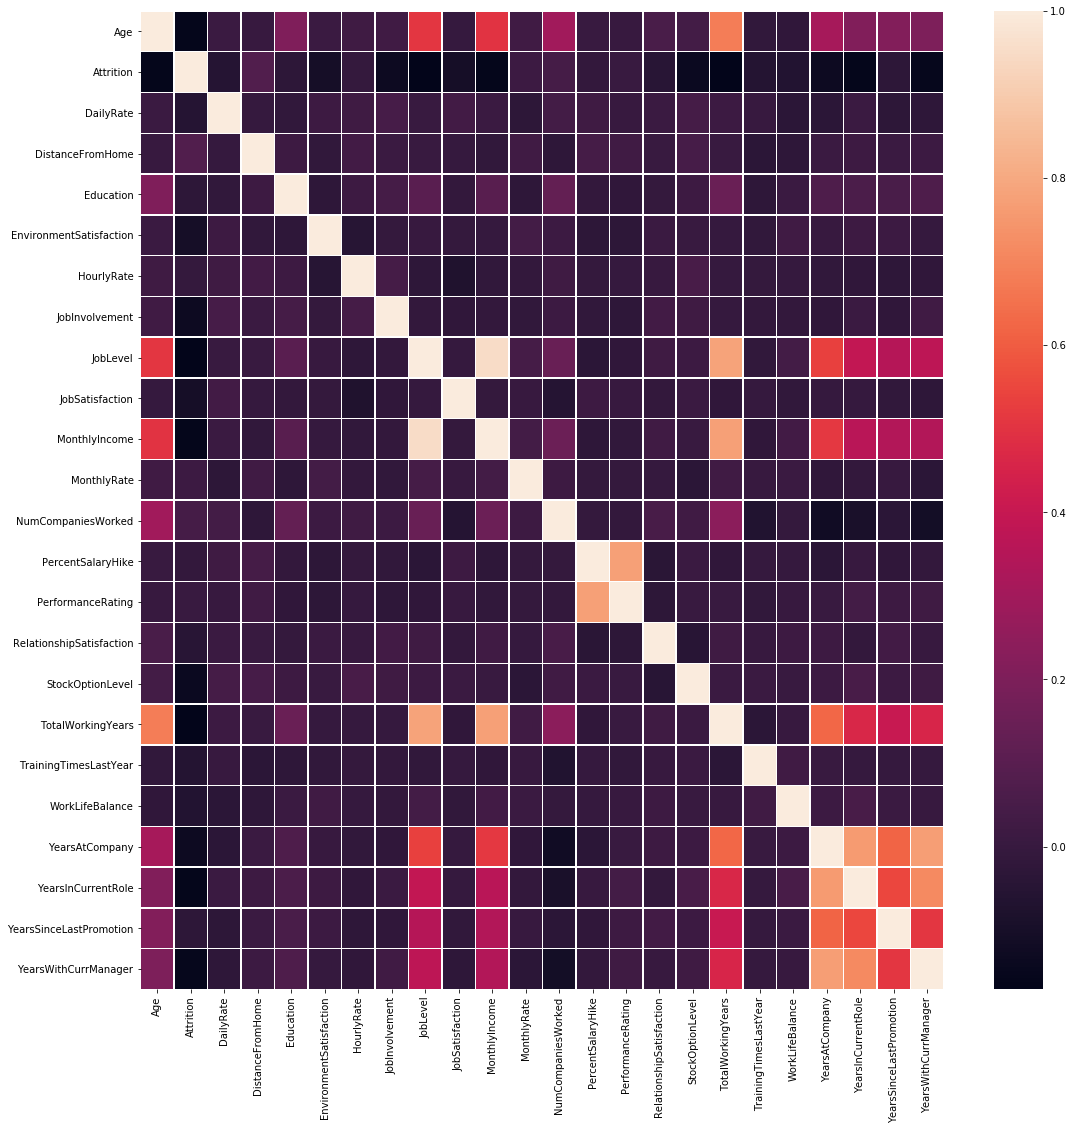

In [11]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), linewidths=.5) 

<p> Interesting - no one factor seems to correlate very well with attrition, likely many things that play into it

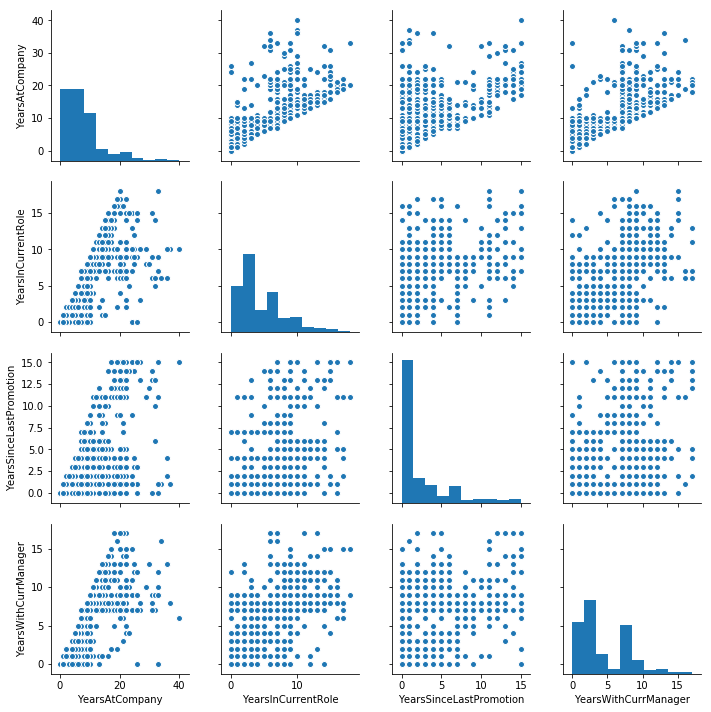

In [12]:
sns.pairplot(data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])

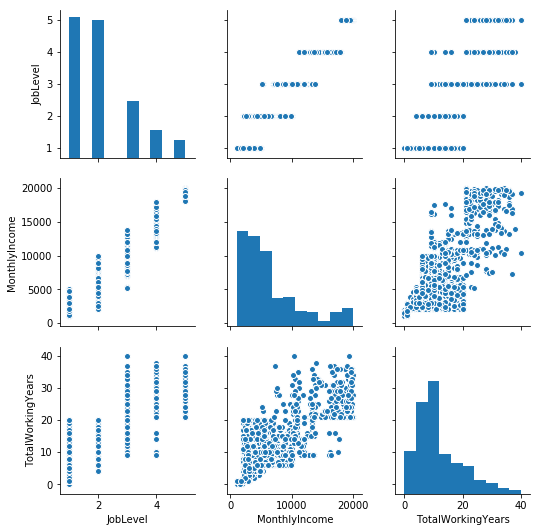

In [13]:
sns.pairplot(data[['JobLevel', 'MonthlyIncome', 'TotalWorkingYears']])

<p> Fairly strong correlations between income, total working years, and job level/importance

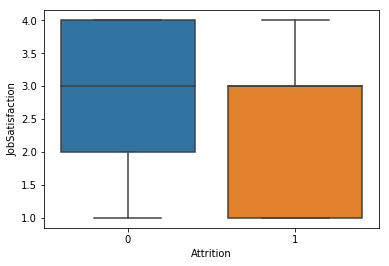

In [14]:
sns.boxplot(data=data, x='Attrition', y='JobSatisfaction')

<p> Makes sense - the less satisfied you are with your job, the more likely you are to leave the company

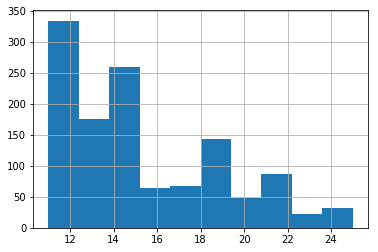

In [15]:
data[data['Attrition']==0]['PercentSalaryHike'].hist()

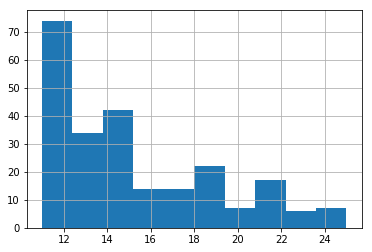

In [16]:
data[data['Attrition']==1]['PercentSalaryHike'].hist()

<p> Getting a raise doesn't seem to influence attrition very much

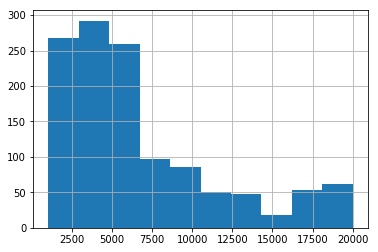

In [17]:
data[data['Attrition']==0]['MonthlyIncome'].hist()

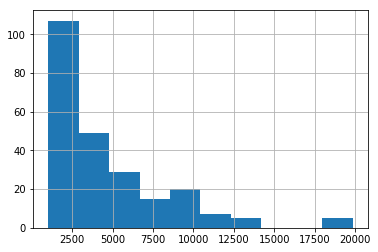

In [18]:
data[data['Attrition']==1]['MonthlyIncome'].hist()

<p> Income may play a role in attrition - it seems like maybe there's less attrition for the mid to upper payed employees, and more attrition in the lowest incomes

In [19]:
list(data.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [20]:
data = data[['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

In [21]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<h3> One hot encoding

In [22]:
business_travel = pd.get_dummies(data.BusinessTravel)
department = pd.get_dummies(data.Department)
ed_field = pd.get_dummies(data.EducationField)
gender = pd.get_dummies(data.Gender)
job_role = pd.get_dummies(data.JobRole)
marital_status = pd.get_dummies(data.MaritalStatus)
overtime = pd.get_dummies(data.OverTime)

In [23]:
data = pd.merge(data, business_travel, right_index=True, left_index=True)
data = pd.merge(data, department, right_index=True, left_index=True)
data = pd.merge(data, ed_field, right_index=True, left_index=True)
data = pd.merge(data, gender, right_index=True, left_index=True)
data = pd.merge(data, job_role, right_index=True, left_index=True)
data = pd.merge(data, marital_status, right_index=True, left_index=True)
data = pd.merge(data, overtime, right_index=True, left_index=True)

In [24]:
data.drop('BusinessTravel', axis=1, inplace=True)
data.drop('Department', axis=1, inplace=True)
data.drop('EducationField', axis=1, inplace=True)
data.drop('Gender', axis=1, inplace=True)
data.drop('JobRole', axis=1, inplace=True)
data.drop('MaritalStatus', axis=1, inplace=True)
data.drop('OverTime', axis=1, inplace=True)

In [25]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,No,Yes
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,1,37,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,0,27,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [26]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

<h2> Predictions using different algorithms

<h3> Logistic Regression

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [28]:
log_acc = metrics.accuracy_score(y_test, y_pred)
log_conf = metrics.confusion_matrix(y_test, y_pred)
log_class_rep = classification_report(y_test, y_pred, target_names=['stayed at company', 'left company'])
log_roc = metrics.roc_auc_score(y_test, y_pred)

<h3> Random forest

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [30]:
rf_acc = metrics.accuracy_score(y_test, y_pred)
rf_conf = metrics.confusion_matrix(y_test, y_pred)
rf_class_rep = classification_report(y_test, y_pred, target_names=['stayed at company', 'left company'])
rf_roc = metrics.roc_auc_score(y_test, y_pred)

<h3> Support vector machine

In [31]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [32]:
svm_acc = metrics.accuracy_score(y_test, y_pred)
svm_conf = metrics.confusion_matrix(y_test, y_pred)
svm_class_rep = classification_report(y_test, y_pred, target_names=['stayed at company', 'left company'])
svm_roc = metrics.roc_auc_score(y_test, y_pred)

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3> Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

In [34]:
bayes_acc = metrics.accuracy_score(y_test, y_pred)
bayes_conf = metrics.confusion_matrix(y_test, y_pred)
bayes_class_rep = classification_report(y_test, y_pred, target_names=['stayed at company', 'left company'])
bayes_roc = metrics.roc_auc_score(y_test, y_pred)

<h2> Comparing the models

<h3> Accuracy Scores

In [35]:
print("Logistic regression: ", log_acc)
print("Random forest: ", rf_acc)
print("SVM: ", svm_acc)
print("Naive Bayes: ", bayes_acc)

Logistic regression:  0.8877551020408163
Random forest:  0.8469387755102041
SVM:  0.8333333333333334
Naive Bayes:  0.7721088435374149


<h3> Confusion Matrices

In [36]:
print("Logistic regression")
print(log_conf)
print()
print("Random forest")
print(rf_conf)
print()
print("SVM")
print(svm_conf)
print()
print("Naive Bayes")
print(bayes_conf)

Logistic regression
[[241   4]
 [ 29  20]]

Random forest
[[241   4]
 [ 41   8]]

SVM
[[245   0]
 [ 49   0]]

Naive Bayes
[[196  49]
 [ 18  31]]


<h3> Classification Reports

In [37]:
print("Logistic regression")
print(log_class_rep)
print()
print("Random forest")
print(rf_class_rep)
print()
print("SVM")
print(svm_class_rep)
print()
print("Naive Bayes")
print(bayes_class_rep)

Logistic regression
                   precision    recall  f1-score   support

stayed at company       0.89      0.98      0.94       245
     left company       0.83      0.41      0.55        49

      avg / total       0.88      0.89      0.87       294


Random forest
                   precision    recall  f1-score   support

stayed at company       0.85      0.98      0.91       245
     left company       0.67      0.16      0.26        49

      avg / total       0.82      0.85      0.81       294


SVM
                   precision    recall  f1-score   support

stayed at company       0.83      1.00      0.91       245
     left company       0.00      0.00      0.00        49

      avg / total       0.69      0.83      0.76       294


Naive Bayes
                   precision    recall  f1-score   support

stayed at company       0.92      0.80      0.85       245
     left company       0.39      0.63      0.48        49

      avg / total       0.83      0.77      0.79   

<h3> Area under ROC curve

In [38]:
print("Logistic regression: ", log_roc)
print("Random forest: ", rf_roc)
print("SVM: ", svm_roc)
print("Naive Bayes: ", bayes_roc)

Logistic regression:  0.6959183673469388
Random forest:  0.573469387755102
SVM:  0.5
Naive Bayes:  0.7163265306122449


<p> Oveall, it seems that logistic regression performed the best, and SVM performed the worst. SVM simply predicted all 0's, so that is a poor model for this data. Random forest also predicted too many 0's, but not as bad as SVM. The accuracy score for logistic regression was about 10% points higher than Naive Bayes, although Naive Bayes had a slightly higher area under the ROC curve. Naive Bayes classified more true positives than logistic regression, and less false negatives, but also predicted more false positives than logistic regression. Random forest performed slightly worse overall than both logistic regression and Naive Bayes.